In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [37]:
ev_path = 'Resources/Clean_EV_Data.csv'
ev_df = pd.read_csv(ev_path)
# ev_df.head()
census_path = 'Resources/2022_census'
cen_df = pd.read_csv(census_path)

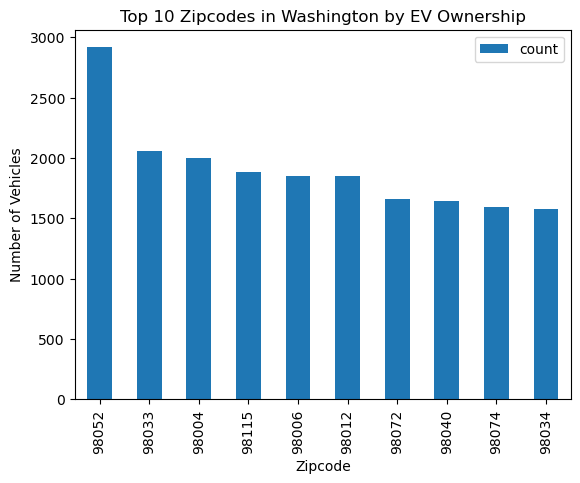

In [38]:
#Ownership by zipcode
zip_count = ev_df['Postal Code'].value_counts()
zip_count_df = pd.DataFrame(zip_count)

#Narrowing DataFrame to only top 10 zipcodes with most EV ownership
zip_df = zip_count_df.nlargest(10,columns=['count'])
zip_df

zip_df.plot(kind='bar',title='Top 10 Zipcodes in Washington by EV Ownership',xlabel='Zipcode',ylabel='Number of Vehicles')

plt.show()

In [66]:
# population by zipcode
cen_df

,Zipcode ID,Census Year,WA Zipcode,Median Household Income,Income Per Capita,Population
1029,1029,2022,98901,55536,25237.0,33106
1030,1030,2022,98237,68929,31650.0,4979
1031,1031,2022,98201,71313,41730.0,30587
1032,1032,2022,98021,155891,67017.0,34993
1033,1033,2022,98203,96351,44288.0,36448
...,...,...,...,...,...,...
1540,1540,2022,99131,34081,31798.0,122
1541,1541,2022,99348,74211,32056.0,1590
1543,1543,2022,98336,76250,30549.0,594
1544,1544,2022,98935,60085,18814.0,4378


In [67]:
# get population and zipcode separated from df
pop_df = cen_df[['WA Zipcode', 'Population']]
sorted_pop = pop_df.sort_values(by='Population', ascending=False)
top_pop_df = sorted_pop.head(10)
# get income and zipcode separated from df
income_df = cen_df[['WA Zipcode', 'Median Household Income']]
sorted_income = income_df.sort_values(by='Median Household Income', ascending=False)
top_income_df = sorted_income.head(10)
#get per capita and zipcode separted from df
pc_df = cen_df[['WA Zipcode','Income Per Capita']]

In [ ]:
# merge 

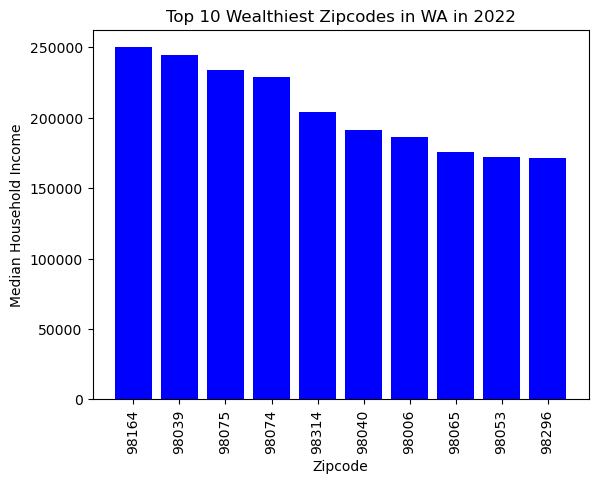

In [62]:
# plot income vs zipcode to find similarities
x_axis = np.arange(len(top_income_df['WA Zipcode']))
income_axis = top_income_df['Median Household Income']
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, top_income_df['WA Zipcode'],rotation='vertical')
plt.title("Top 10 Wealthiest Zipcodes in WA in 2022")
plt.xlabel("Zipcode")
plt.ylabel("Median Household Income")
plt.bar(x_axis, income_axis, color='b')
plt.show()

**only 98074 are in the top 10 wealthiest and top 10 EV ownership dataframes**

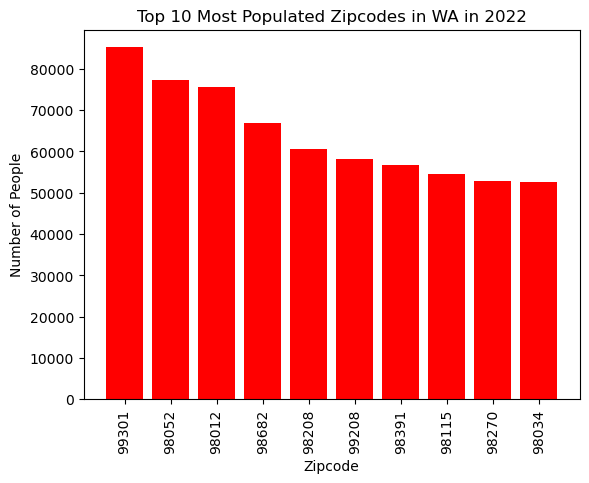

In [65]:
zip_axis = np.arange(len(top_pop_df['WA Zipcode']))
pop_axis = top_pop_df['Population']
tick_locations = [value for value in zip_axis]
plt.xticks(tick_locations, top_pop_df['WA Zipcode'],rotation='vertical')
plt.title("Top 10 Most Populated Zipcodes in WA in 2022")
plt.xlabel("Zipcode")
plt.ylabel("Number of People")
plt.bar(zip_axis, pop_axis, color='r')
plt.show()

**the zipcodes 98052 and 98115 show up both in the top 10 population and top 10 EV ownership graphs**

In [ ]:
# run some linear regression to show if population affects EV ownership
